In [11]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_input, train_target), (test_input, test_target) = \
    fashion_mnist.load_data()

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
train_input_scaled_3d = train_input.reshape(-1, 28, 28, 1) / 255.0
test_input_scaled_3d = test_input.reshape(-1, 28, 28, 1) / 255.0

train_input_scaled_3d, val_input_scaled_3d, train_target, val_target = \
    train_test_split(train_input_scaled_3d, train_target, test_size=0.2, random_state=1234)

print(train_input_scaled_3d.shape, train_target.shape)
print(val_input_scaled_3d.shape, val_target.shape)
print(test_input_scaled_3d.shape, test_target.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)
(10000, 28, 28, 1) (10000,)


## Create CNN Model

In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2))

model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(2))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

checkpoint_cb = ModelCheckpoint('best-cnn-model.h5')
earlystopping_cb = EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(
    train_input_scaled_3d,
    train_target,
    epochs=20,
    validation_data=(val_input_scaled_3d, val_target),
    callbacks=[checkpoint_cb, earlystopping_cb]
)

Epoch 1/20
1500/1500 [==============================] - 38s 25ms/step - loss: 0.6878 - accuracy: 0.7497 - val_loss: 0.3231 - val_accuracy: 0.8818
Epoch 2/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.3403 - accuracy: 0.8784 - val_loss: 0.2843 - val_accuracy: 0.8975
Epoch 3/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2856 - accuracy: 0.8968 - val_loss: 0.2483 - val_accuracy: 0.9087
Epoch 4/20
1500/1500 [==============================] - 38s 25ms/step - loss: 0.2573 - accuracy: 0.9066 - val_loss: 0.2339 - val_accuracy: 0.9136
Epoch 5/20
1500/1500 [==============================] - 37s 24ms/step - loss: 0.2288 - accuracy: 0.9160 - val_loss: 0.2424 - val_accuracy: 0.9122
Epoch 6/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.2037 - accuracy: 0.9254 - val_loss: 0.2180 - val_accuracy: 0.9208
Epoch 7/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.1893 - accuracy: 0.9305 - val_loss: 0.2120 -

In [12]:
history_df = pd.DataFrame(history.history)

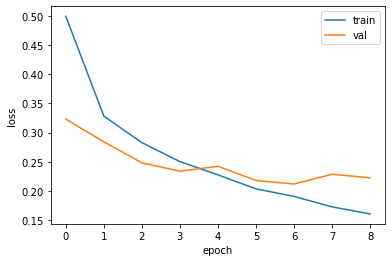

''

In [13]:
plt.plot(history_df['loss'])
plt.plot(history_df['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()
;

In [15]:
model.evaluate(val_input_scaled_3d, val_target)

375/375 [==============================] - 2s 6ms/step - loss: 0.2120 - accuracy: 0.9222


[0.2120485007762909, 0.922166645526886]

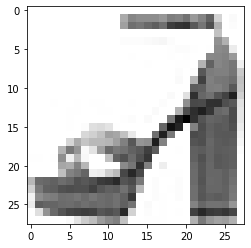

''

In [16]:
plt.imshow(val_input_scaled_3d[0].reshape(28, 28), cmap='gray_r')
plt.show()
;

In [18]:
model.predict(val_input_scaled_3d[0:1])

array([[6.8159434e-10, 1.0214572e-12, 8.6906211e-12, 1.6840315e-15,
        4.1200272e-14, 1.0000000e+00, 9.6379231e-14, 2.5527766e-11,
        4.3919306e-11, 6.6200414e-09]], dtype=float32)

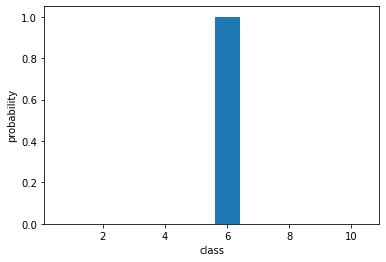

''

In [20]:
plt.bar(range(1, 11, 1), model.predict(val_input_scaled_3d[0:1])[0])

plt.xlabel('class')
plt.ylabel('probability')
plt.show()
;

In [21]:
class_dict = ['T-shirt', 'Pants', 'Sweater', 'Dress', 'Coat', 'Sandal', 'Shirt',
           'Sneakers', 'Bag', 'Boots']

class_dict[np.argmax(model.predict(val_input_scaled_3d[0:1])[0])]

'Sandal'

In [22]:
model.evaluate(test_input_scaled_3d, test_target)

313/313 [==============================] - 2s 6ms/step - loss: 0.2343 - accuracy: 0.9156


[0.2343287169933319, 0.9156000018119812]